El conjunto de datos ya forma parte de la biblioteca Scikit-Learn, sólo tenemos que importarlo y cargarlo como un marco de datos:

# KNN IRIS

In [257]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn import datasets
import seaborn as sns


In [258]:
iris= sns.load_dataset("iris")
iris.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [292]:
# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
data = iris.data  # Obtener los datos
feature_names = iris.feature_names  # Obtener los nombres de las características
target = iris.target  # Obtener las etiquetas de especies

# Crear un DataFrame de pandas con los datos de Iris, los nombres de las características y la columna de especies
df = pd.DataFrame(data=data, columns=feature_names)

# Mostrar las primeras filas del DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [293]:
df["sepal_width_iris"] = pd.qcut(df["sepal width (cm)"], 4, retbins=False, labels=[1, 2, 3, 4])
df["sepal_width_iris"]

0      4
1      2
2      3
3      3
4      4
      ..
145    2
146    1
147    2
148    4
149    2
Name: sepal_width_iris, Length: 150, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [294]:
# A continuación, podemos dividir nuestro conjunto de datos en sus atributos y etiquetas:
y = df['sepal_width_iris']
X = df.drop(['sepal_width_iris', 'sepal width (cm)', 'petal width (cm)', 'sepal length (cm)'], axis = 1)

In [295]:
y.head()

0    4
1    2
2    3
3    3
4    4
Name: sepal_width_iris, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [296]:
X.head()

,petal length (cm)
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


#### Dividir los datos en conjuntos de entrenamiento y de prueba

In [297]:
from sklearn.model_selection import train_test_split

#Semilla aleatoria debido que es un modelo de aprendizaje porlo tanto cada que ejecute el mismo codigo, obtendra la misma división de datos cada vez. 
SEED = 42
# Esta línea realiza la división real del conjunto de datos en conjuntos de entrenamiento y prueba. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [298]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

#Se crea un escaler
scaler = StandardScaler()
# Ajusta el StandardScaler a los datos de entrenamiento (X_train)
scaler.fit(X_train)

# Aplica la transformación de escala a las características del conjunto de entrenamiento (X_train)
X_train = scaler.transform(X_train)

# Aplica la misma transformación de escala a las características del conjunto de prueba (X_test)
X_test = scaler.transform(X_test)

### Entrenamiento y predicción para la clasificación

In [299]:
from sklearn.neighbors import KNeighborsClassifier

# Crea una instancia del KNeighborsClassifier
#El hiperparámetro más importante en KNN es k, que representa el número de vecinos más cercanos a considerar cuando se toma una decisión de clasificación
classifier = KNeighborsClassifier()

# Entrena el modelo con los datos de entrenamiento
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [300]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

In [301]:
acc =  classifier.score(X_test, y_test)
print(acc) 

0.42105263157894735


#### Finding the Best K for KNN Classification

In [302]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

El siguiente paso consiste en representar gráficamente los valores de f1_score frente a los valores de K. La diferencia con la regresión es que en lugar de elegir el valor K que minimiza el error, esta vez elegiremos el valor que maximiza la puntuación f1.

Ejecute el siguiente script para crear el gráfico:

Text(0, 0.5, 'F1 Score')

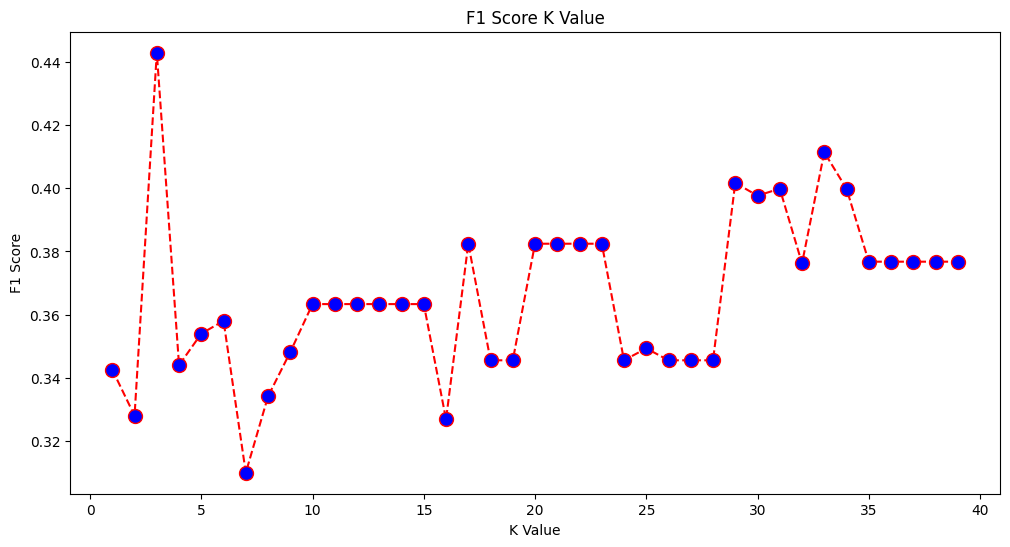

In [303]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

A partir de la salida, podemos ver que la puntuación f1 es la más alta cuando el valor de K es 3. De acuerdo a este resultadoo clasificaremos el siguiente modelo con base en las 3 especies de flores.

## Mejor Modelo

None 0.8133333333333334
0.2 0.82


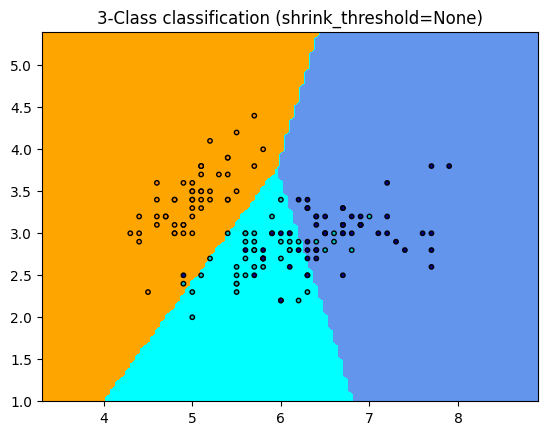

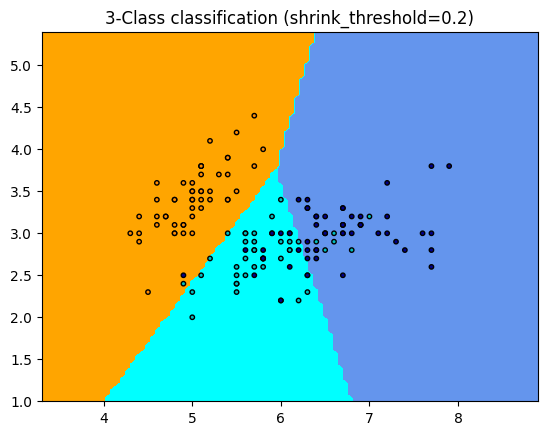

In [289]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Seleccionar dos características diferentes, por ejemplo, 'sepal length (cm)' y 'sepal width (cm)'
X_2d = X[:, [0, 1]]  # Seleccionar las dos primeras características
y = iris.target  # Usar las etiquetas originales de Iris

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None, 0.2]:
    # Crear una instancia del clasificador de Nearest Centroid y ajustar los datos.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    
    clf.fit(X_2d, y)
    y_pred = clf.predict(X_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X_2d, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10)
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()

In [281]:
# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
data = iris.data  # Obtener los datos
feature_names = iris.feature_names  # Obtener los nombres de las características
target = iris.target  # Obtener las etiquetas de especies

# Crear un DataFrame de pandas con los datos de Iris, los nombres de las características y la columna de especies
iris = pd.DataFrame(data=data, columns=feature_names)
iris['species'] = target  # Agregar la columna de especies al DataFrame

# Mostrar las primeras filas del DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species sepal_width_iris  
0        0                4  
1        0                2  
2        0                3  
3        0                3  
4        0                4  


In [282]:
X = iris.drop(['species'], axis=1)
y = iris['species']

In [283]:
from sklearn.model_selection import train_test_split

#Semilla aleatoria debido que es un modelo de aprendizaje porlo tanto cada que ejecute el mismo codigo, obtendra la misma división de datos cada vez. 
SEED = 42

# Esta línea realiza la división real del conjunto de datos en conjuntos de entrenamiento y prueba. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [284]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

#Se crea un escaler
scaler = StandardScaler()
# Ajusta el StandardScaler a los datos de entrenamiento (X_train)
scaler.fit(X_train)

# Aplica la transformación de escala a las características del conjunto de entrenamiento (X_train)
X_train = scaler.transform(X_train)

# Aplica la misma transformación de escala a las características del conjunto de prueba (X_test)
X_test = scaler.transform(X_test)

In [285]:
from sklearn.neighbors import KNeighborsClassifier

# Crea una instancia del KNeighborsClassifier
#El hiperparámetro más importante en KNN es k, que representa el número de vecinos más cercanos a considerar cuando se toma una decisión de clasificación
classifier = KNeighborsClassifier()

# Entrena el modelo con los datos de entrenamiento
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [286]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

In [287]:
acc =  classifier.score(X_test, y_test)
print(acc)

1.0


La exactitud es de 100% por lo que podemos afirmar que estamos haciendo uso del mejor modelo y que hay un 100% de predicciónes correctas como se peude observar en la matriz de confusión:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



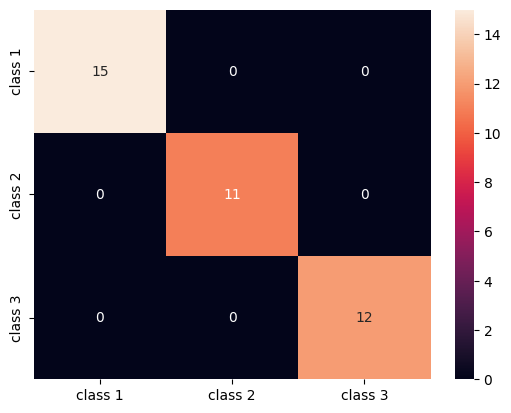

In [288]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Añadir nombres de clases para una mejor nterpretación
classes_names = ['class 1','class 2','class 3']

#Crear matriz de confusión
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
#Se utiliza Seaborn para crear un mapa de calor (heatmap) que visualiza la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d');

# El informe de clasificación proporciona una serie de métricas, incluyendo la precisión, el recall, la puntuación F1 
print(classification_report(y_test, y_pred))

Podemos analizar de la matriz de confusión que el desempeño del algoritmo es verdadero-positivo al usar la clasificación 3 por lo tanto ninguna clase es confundida por otra y no hay error.

In [290]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

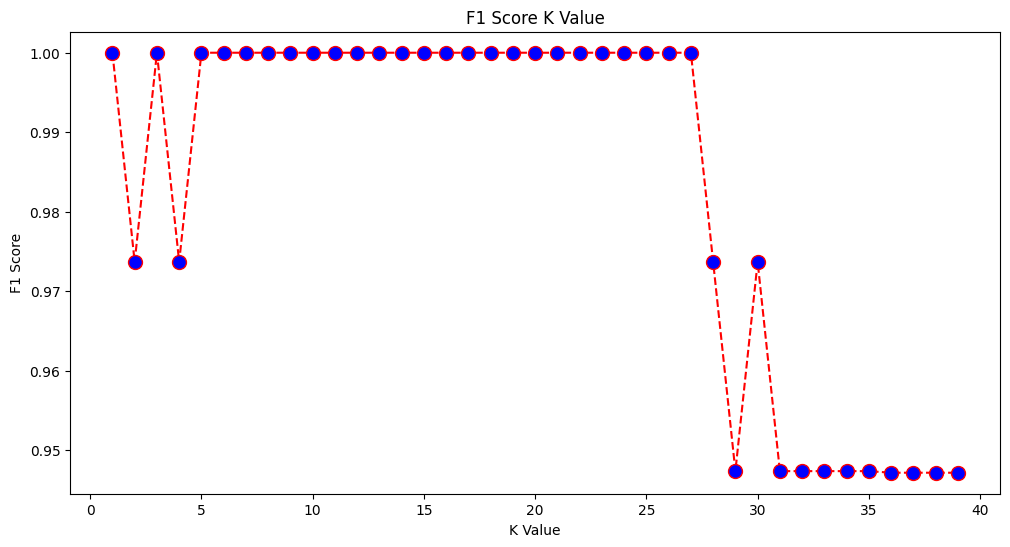

In [291]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

El F1 alcanza un maximo de 1.00 lo cual simboliza que es un "ideal posible" con 38 vecinos, adicionalmente como se observó la precision y el recall son igual a 1.00 por lo tanto su promedio es 1.00. Por otro lado, podemos ver como el eje (y) de F1-score toma como valor minimo aproximadamnte 0.94 es decir desde los 0 hasta los 38 k vecinos van a tener un excelente rendimiento.